In [1]:
#本文是onevsall多分类器的实现
#load the datasets 导入手写字体数据集
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

digits = load_digits()
print digits.keys()
data = digits.data
target = digits.target

print data.shape
print target.shape
print "the images 15 is",target[15]

['images', 'data', 'target_names', 'DESCR', 'target']
(1797L, 64L)
(1797L,)
the images 15 is 5


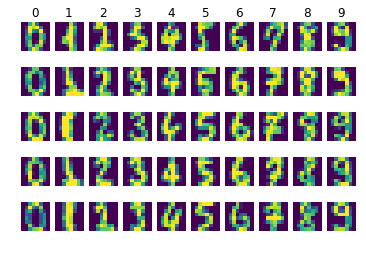

In [2]:
#Randomly select 50 data points to display
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
num_classes = len(classes)
samples_per_class = 5
for y, cla in enumerate(classes):
    idxs = np.flatnonzero(target == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(digits.images[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cla)
plt.show()

In [68]:
#regularized logistic,基本跟正则化用于逻辑回归原理一样，只是为了使用
#优化算法，我稍微改写了cost函数和gradient函数,分别为f(),gradf()
def sigmoid(x):
    return 1 / (1+np.exp(-x))
def out(x,w):
    return sigmoid(np.dot(x,w))

def f(params,*args):
    X_train,y_train,reg = args
    m,n = X_train.shape
    J = 0
    theta = params.reshape((n,1))
    h = out(X_train,theta)
    theta_1 = theta[1:,:]
    J = -1*np.sum(y_train*np.log(h) + (1-y_train)*np.log((1-h))) / m +\
        + 0.5 * reg * theta_1.T.dot(theta_1) / m
    
    return J

def gradf(params,*args):
    X_train,y_train,reg = args
    m,n = X_train.shape
    theta = params.reshape(-1,1)
    h = out(X_train,theta)
    grad = np.zeros((X_train.shape[1],1))
    theta_1 = theta[1:,:]
    grad = X_train.T.dot((h-y_train)) / m
    grad[1:,:] += reg*theta_1/m  #theta0 without reg
    g = grad.ravel()
    return g  
    

In [69]:
from scipy import optimize


def oneVsAll(x,y,num_class,reg):
    m,n = x.shape
    thetas = np.zeros((n,num_class))
    #每次只训练一个分类器，就相当于，y==i时，是1，其他等于0
    for i in xrange(num_class):
        params = np.zeros((x.shape[1],1)).ravel()
        #yy = np.zeros(y.shape)
        #yy[y==i] = 1
        args = (x,y==i,reg)
        #使用优化算法去训练
        res = optimize.fmin_cg(f,x0=params,fprime=gradf,args=args,maxiter=500)
        thetas[:,i] = res
    
    return thetas


X = data
y = target
y = y.reshape((-1,1))
#normalized
X_mean = np.mean(X,axis=0)
X -= X_mean
m = X.shape[0]
X = np.hstack((np.ones((m,1)),X)) #add the one

thetas = oneVsAll(X,y,10,1.0)
print thetas.shape


Optimization terminated successfully.
         Current function value: 0.000846
         Iterations: 200
         Function evaluations: 605
         Gradient evaluations: 605


         Current function value: 0.016554
         Iterations: 500
         Function evaluations: 763
         Gradient evaluations: 763


Optimization terminated successfully.
         Current function value: 0.001304
         Iterations: 224
         Function evaluations: 634
         Gradient evaluations: 634


         Current function value: 0.014488
         Iterations: 500
         Function evaluations: 943
         Gradient evaluations: 943


Optimization terminated successfully.
         Current function value: 0.001747
         Iterations: 366
         Function evaluations: 994
         Gradient evaluations: 994


Optimization terminated successfully.
         Current function value: 0.003441
         Iterations: 319
         Function evaluations: 788
         Gradient evaluations: 788


         Current function value: 0.002328
         Iterations: 500
         Function evaluations: 1258
         Gradient evaluations: 1258


         Current function value: 0.002955
         Iterations: 500
         Function evaluations: 1244
         Gradient evaluations: 1244


Optimization terminated successfully.
         Current function value: 0.068728
         Iterations: 489
         Function evaluations: 709
         Gradient evaluations: 709


         Current function value: 0.018580
         Iterations: 500
         Function evaluations: 818
         Gradient evaluations: 818
(65L, 10L)


In [70]:
def predict(x,thetas):
    h = out(x,thetas)
    a = sigmoid(h)
    pred = np.argmax(a,axis=1) #选出数值最大的下标最为分类
    return pred
y_pred = predict(X,thetas)
print "train accuracy is :",np.mean(y.ravel() == y_pred)

    

train accuracy is : 0.997774067891


In [71]:
#随机选出几个图片，测试一下，当然，还是在train set上面测试,展示一下训练的效果
m,n = data.shape
example_size = 10
example_index = np.random.choice(m,example_size)
print example_index
for i, idx in enumerate(example_index):
    
    print "%d example is number %d,we predict it as %d"\
          %(i,target[idx],predict(X[idx,:].reshape(1,-1),thetas))
    

[ 819 1441  573 1677 1056  224  407 1650  635 1575]
0 example is number 7,we predict it as 7
1 example is number 6,we predict it as 6
2 example is number 2,we predict it as 2
3 example is number 0,we predict it as 0
4 example is number 7,we predict it as 7
5 example is number 8,we predict it as 8
6 example is number 1,we predict it as 1
7 example is number 5,we predict it as 5
8 example is number 9,we predict it as 9
9 example is number 5,we predict it as 5


In [73]:
#好吧，我们导入已经有的数据集和权重参数，看一下神经网络的oneVSall预测函数
import scipy.io as sio
#从mat文件导入数据
weight = sio.loadmat("ex3weights")
Theta1 = weight["Theta1"]
Theta2 = weight["Theta2"]

print Theta1.shape
print Theta2.shape

data = sio.loadmat("ex3data1")
X = data["X"]
y = data["y"]
print X.shape
print y.shape

(25L, 401L)
(10L, 26L)
(5000L, 400L)
(5000L, 1L)


In [74]:
#add one 
m = X.shape[0]
X1 = np.hstack((np.ones((m,1)),X))
print X1.shape
def nn_predict(x,theta1,theta2):
    m = x.shape[0]
    a1 = sigmoid(x.dot(theta1.T))
    a1 = np.hstack((np.ones((m,1)),a1))
    a2 = sigmoid(a1.dot(theta2.T))
    pred = np.argmax(a2,axis=1)+1
    return pred

pred = nn_predict(X1,Theta1,Theta2)
pred[pred==0] = 10  #note that we have mapped "0" to label 10
print pred[-10:]
print y[-10:]
print "train accuracy is :",np.mean(y == pred.reshape(-1,1))*100

(5000L, 401L)
[3 9 9 9 9 9 9 9 9 9]
[[9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]
 [9]]
train accuracy is : 97.52


In [76]:
#随机选择样本，测试一下，看看预测的准不准
m,n = X1.shape
example_size = 10
example_index = np.random.choice(m,example_size)
print example_index
for i, idx in enumerate(example_index):
    
    print "%d example is number %d,we predict it as %d"\
          %(i,y[idx],nn_predict(X1[idx,:].reshape(1,-1),Theta1,Theta2))
    

[ 348 4231 2573  762 2171 4809 4944   25 3471 2384]
0 example is number 10,we predict it as 10
1 example is number 8,we predict it as 8
2 example is number 5,we predict it as 5
3 example is number 1,we predict it as 1
4 example is number 4,we predict it as 9
5 example is number 9,we predict it as 9
6 example is number 9,we predict it as 9
7 example is number 10,we predict it as 10
8 example is number 6,we predict it as 6
9 example is number 4,we predict it as 9
